In [1]:
import pandas as pd
import numpy as np
import statistics 
from scipy.stats import zscore
from datetime import datetime

df = pd.read_csv('try_and_try_title.csv')
nuser = df['get_user_ID'].nunique()
nuser

100

In [2]:
user = df['get_user_ID'].unique()

In [3]:
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 35)

# get all video-based learning materials
col_video = ['第二十课 什么最重要（2.25）', '第二十课 《什么最重要》课文+操练', 
            '第二十一课 《理发》生词+语法3.10', '第二十一课《理发》课文+练习 3.17',
            '第二十二课 《母亲的心》生词+语法 3.24', '第二十二课《母亲的心》课文+练习3.31',
            '第二十三课 《网络学校》生词+语法 4.7', '第二十三课 《网络学校》课文+练习4.14', 
             '第二十四课 《情商》生词+语法 4.21', '第二十四课 《情商》课文+练习4.26', 
             '第二十五课 《中秋月圆》生词+课文 4.28', '第二十五课 《中秋月圆》课文+练习 5。12',
             '第二十六课 《梁山伯与祝英台》生词+语法', '第二十六课 《梁山伯与祝英台》课文+练习 6.2', 
             '第二十六课 《梁山伯与祝英台》赏析及模拟 5.26']

# get all text-based learning materials
col_text = ['第二十课《什么最重要》(生词+语法）', '第二十课《什么最重要》(课文+操练）', 
            '第二十一课 理发（生词+语法）', '第二十一课 《理发》（课文+操练）',
           '第二十二课 《母亲的心》（生词+语法）', '第二十二课《母亲的心》（课文+操练）',
           '第二十三课 《网络学校》生词+语法', '第二十三课 《网络学校》课文+练习', 
           '第二十四课 《情商》生词+语法', '第二十四课 《情商》课文+练习', 
           '第二十五课 《中秋月圆》生词+语法', '第二十五课 中秋月圆 课文+练习',
            '第二十六课《梁山伯与祝英台》生词+语法', '第二十六课 《梁山伯与祝英台》课文+练习']

# get practices
col_prac = ['第20课 什么最重要 课后作业', '第二十一课 《理发》课后练习', '第二十二课课后练习',
           '第二十三课 《网络学校》', '第二十四课 《情商》测试练习', '第二十五课 《中秋月圆》练习',
           '模拟测试']

# get syllabus
col_syll = ['汉语（乙）II课程说明']



In [4]:
#course started on 2020-02-24
#course ended on 2020-06-26


Learners = {}
Table_raw = {}
Table_1 = {}
Table_1_1 = {}
Table_2 = {}
Table_2_1 = {}
Table_2_2 = {}
Table_2_3 = {}
Table_2_4 = {}
Table_3 = {}
Table_3_1 = {}
Table_3_2 = {}
Table_3_3 = {}
Table_3_4 = {}

# Create 3 tables
for i in user:
     Table_raw[i] = df.loc[df['get_user_ID'] == i]
     Table_raw[i]['get_user_ID'] = Table_raw[i]['get_user_ID'].astype(str)
     
# Create Table 1 => parent table
     # replace time spent less than 1s with string '00:00:01'
     Table_1[i] = Table_raw[i].replace('不足1s', '00:00:01')

     # transfer string types of all time spent to time types 
     Table_1[i]['time_spent'] = pd.to_timedelta(Table_1[i].time_spent)

     # format visit time and tranfer the string types to time types
     Table_1[i]['visit_time'] = pd.to_datetime(Table_1[i].visit_time, format='%Y.%m.%d %H:%M')

     # create a new column that focuses on log-in dates only
     Table_1[i]['visit_date'] = Table_1[i]['visit_time'].dt.date

     # sort by visit time
     Table_1[i] = Table_1[i].sort_values('visit_time')
        
     # convert to seconds
     Table_1[i]['time_spent'] = Table_1[i]['time_spent'].dt.total_seconds()
        
     # *create a sub-table with types only (just in case)
     Table_1_1[i] = Table_1[i][Table_1[i].event_name != '- -']
    
# Create Table 2 => event behavior table 
     Table_2[i] = Table_1[i].groupby(['event_name']).agg(time_sum = 
                                                         ('time_spent', 'sum'),
                                                         visits_count = 
                                                         ('event_name', 'count')).reset_index()
     Table_2[i].set_index('event_name', inplace=True)
    
    # create a sub-table for video-type activities
     Table_2_1[i] = Table_2[i].reindex(col_video)
     Table_2_1[i]['time_sum'] = Table_2_1[i]['time_sum'].fillna(0)
     Table_2_1[i]['visits_count'] = Table_2_1[i]['visits_count'].fillna(0)
    
    # create a sub-table for text-type activities
     Table_2_2[i] = Table_2[i].reindex(col_text)
     Table_2_2[i]['time_sum'] = Table_2_2[i]['time_sum'].fillna(0)
     Table_2_2[i]['visits_count'] = Table_2_2[i]['visits_count'].fillna(0)    
    
    # create a sub-table for practice-type activities
     Table_2_3[i] = Table_2[i].reindex(col_prac)
     Table_2_3[i]['time_sum'] = Table_2_3[i]['time_sum'].fillna(0)
     Table_2_3[i]['visits_count'] = Table_2_3[i]['visits_count'].fillna(0)     
    
    # create a sub-table for syllabus-type activities 
     Table_2_4[i] = Table_2[i].reindex(col_syll)
     Table_2_4[i]['time_sum'] = Table_2_4[i]['time_sum'].fillna(0)
     Table_2_4[i]['visits_count'] = Table_2_4[i]['visits_count'].fillna(0)
       
    
# Create Table 3 => daily behavior table 
     Table_3[i] = Table_1[i].groupby(['visit_date']).agg(time_sum = 
                                                         ('time_spent', 'sum'),
                                                         visits_count = 
                                                         ('visit_time', 'count')).reset_index()
    # calculate day difference and make NA (1st row) 0 day
     Table_3[i]['day_difference'] = Table_3[i].diff(periods=1, axis=0)['visit_date'].fillna(pd.Timedelta(days=0))
     
     Table_3[i]['day_difference'] = Table_3[i]['day_difference'].apply(lambda x: x.days)
    
    # course started on 2020-02-24
    # mid = 2020-04-24
    # course ended on 2020-06-26
     Table_3_1[i] = Table_3[i][(Table_3[i]['visit_date'] < datetime.strptime('2020-04-24' , '%Y-%m-%d').date())]

     Table_3_2[i] = Table_3[i][(Table_3[i]['visit_date'] >= datetime.strptime('2020-04-24' , '%Y-%m-%d').date())]

     Table_3_3[i] = Table_3[i][(Table_3[i]['visit_date'] <= datetime.strptime('2020-02-23' , '%Y-%m-%d').date())]

     Table_3_4[i] = Table_3[i][(Table_3[i]['visit_date'] >= datetime.strptime('2020-06-27' , '%Y-%m-%d').date())]
    
  
# Create a learner profile which is what we want
     Learners["LEARNER{0}".format(i)] = []
    
    
# Self-control
    # mean of time spent per visit for a video activity
     SC1 = np.mean(Table_2_1[i]['time_sum'] / Table_2_1[i]['visits_count'])
     
    # mean of time spent per visit for a doc activity
     SC2 = np.mean(Table_2_2[i]['time_sum'] / Table_2_2[i]['visits_count'])
     
    # time spent in total / number of visits in total
     SC3 = np.sum(Table_1_1[i]['time_spent']) / Table_1_1[i].shape[0]
    
    # longest time spent on one page
     SC4 = Table_1_1[i]['time_spent'].max()
    
# Engagement
    # time spent in total
     E1 = np.sum(Table_1[i]['time_spent'])        
    # number of visits in total
     E2 = Table_1[i].shape[0]        
    # mean of number of visits per day
     E3 = np.mean(Table_3[i]['visits_count'])        
    # mean of time spent per day
     E4 = np.mean(Table_3[i]['time_sum'])        
    # days spent in total
     E5 = Table_3[i].shape[0]        
    # reciprocal of mean of visit-day-difference
     E6 = np.sum(Table_3[i]['day_difference']) / (Table_3[i].shape[0]-1)
    
# Meta-cognitive Self-regulation
    # reciprocal of SD of number of visits per day
     MSR1 = 1 / np.std(Table_3[i]['visits_count'])
    # reciprocal of SD of time spent per day
     MSR2 = 1 / np.std(Table_3[i]['time_sum'])
    # reciprocal of number of unique visit-day-difference
     MSR3 = 1 / Table_3[i]['day_difference'].nunique()
    # number of activity visits in total /  number of activity
     MSR4 = Table_1_1[i].shape[0] / Table_1_1[i]['event_name'].nunique()
    # time spent on syllabus
     MSR5 = np.sum(Table_2_4[i]['time_sum'])
    # time spent on activities rather than video, text, practice = time spent on "--" + syllabus
     MSR6 = E1 - (np.sum(Table_2_1[i]['time_sum']) + np.sum(Table_2_2[i]['time_sum']) + np.sum(Table_2_3[i]['time_sum']))

# Self-perception
    # reciprocal of difference of number of visits between early and late stages
     SP1 = 1 / abs(np.sum(Table_3_1[i]['visits_count']) - np.sum(Table_3_2[i]['visits_count']))
    # reciprocal of difference of time spent between early and late stages
     SP2 = 1 / abs(np.sum(Table_3_1[i]['time_sum']) - np.sum(Table_3_2[i]['time_sum'])) 
    # reciprocal of difference of day spent between early and late stages
     SP3 = 1 / abs(np.std(Table_3_1[i]['day_difference']) - np.std(Table_3_2[i]['day_difference'])) 

# Motivation 
    # time spent before course starting
     M1 = np.sum(Table_3_3[i]['time_sum'])
    # time spent after course ending
     M2 = np.sum(Table_3_4[i]['time_sum'])
    # number of activities participated (including grading and non-grading) 
     M3 = Table_1[i]['event_name'].nunique()
    # time spent on video, text, practice activities
     M4 = (np.sum(Table_2_1[i]['time_sum']) + np.sum(Table_2_2[i]['time_sum']) + np.sum(Table_2_3[i]['time_sum']))
       
     Learners["LEARNER{0}".format(i)].append(
         list(Table_raw[i]['get_user_ID'].unique()) + 
         list(Table_2_1[i]['time_sum']) + list(Table_2_2[i]['time_sum']) + 
         [SC1, SC2, SC3, SC4, 
         E1, E2, E3, E4, E5, E6, 
         MSR1, MSR2, MSR3, MSR4, MSR5, MSR6, 
         SP1, SP2, SP3, 
         M1, M2, M3, M4])    


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
Learners.items()
Learners_col = ['user_ID'] + col_video + col_text + [
    'SC1', 'SC2', 'SC3', 'SC4', 
    'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 
    'MSR1', 'MSR2', 'MSR3', 'MSR4', 'MSR5', 'MSR6', 
    'SP1', 'SP2', 'SP3', 
    'M1', 'M2', 'M3', 'M4']

Learners

{'LEARNER3190300543': [['3190300543',
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   nan,
   nan,
   386.44444444444446,
   1904.0000000000002,
   9724.0,
   87,
   8.7,
   972.4,
   10,
   14.11111111111111,
   0.13290870380481667,
   0.0006108540323860928,
   0.125,
   3.6,
   8.0,
   9549.0,
   0.06666666666666667,
   0.0001768033946251768,
   0.162125639520934,
   480.0,
   0.0,
   6,
   175.0]],
 'LEARNER3190300856': [['3190300856',
   239.0,
   17.0,
   48.0,
   3.0,
   0.0,
   7.0,
   431.0,
   0.0,
   0.0,
   4.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   195.0,
   25.0,
   87.0,
   376.0,
   227.0,
   0.0,
   116.00000000000001,
   0.0,
   21.0,
   33.0,
   0.0,
   0.0,
   74.0,
   0.0,
   36.916666666666664,
   88.27777777777777,
   148.6304347826087,
   5644.0,
   19947.0,
   282,
   9.096

In [6]:
# jam dictionary into a data frame
df_Learners = pd.DataFrame(columns = Learners_col)
for i in user:
    a_series = pd.Series(Learners['LEARNER' + str(i)][0], index = df_Learners.columns) # why index = df_Learners.columns?
    df_Learners = df_Learners.append(a_series, ignore_index=True)

df_Learners.head()

,user_ID,第二十课 什么最重要（2.25）,第二十课 《什么最重要》课文+操练,第二十一课 《理发》生词+语法3.10,第二十一课《理发》课文+练习 3.17,第二十二课 《母亲的心》生词+语法 3.24,第二十二课《母亲的心》课文+练习3.31,第二十三课 《网络学校》生词+语法 4.7,第二十三课 《网络学校》课文+练习4.14,第二十四课 《情商》生词+语法 4.21,第二十四课 《情商》课文+练习4.26,第二十五课 《中秋月圆》生词+课文 4.28,第二十五课 《中秋月圆》课文+练习 5。12,第二十六课 《梁山伯与祝英台》生词+语法,第二十六课 《梁山伯与祝英台》课文+练习 6.2,第二十六课 《梁山伯与祝英台》赏析及模拟 5.26,第二十课《什么最重要》(生词+语法）,第二十课《什么最重要》(课文+操练）,第二十一课 理发（生词+语法）,第二十一课 《理发》（课文+操练）,第二十二课 《母亲的心》（生词+语法）,第二十二课《母亲的心》（课文+操练）,第二十三课 《网络学校》生词+语法,第二十三课 《网络学校》课文+练习,第二十四课 《情商》生词+语法,第二十四课 《情商》课文+练习,第二十五课 《中秋月圆》生词+语法,第二十五课 中秋月圆 课文+练习,第二十六课《梁山伯与祝英台》生词+语法,第二十六课 《梁山伯与祝英台》课文+练习,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4
0,3190300543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,386.444444,1904.0,9724.0,87,8.700000,972.400000,10,14.111111,0.132909,0.000611,0.125000,3.600000,8.0,9549.0,0.066667,0.000177,0.162126,480.0,0.0,6,175.0
1,3190300856,239.0,17.0,48.0,3.0,0.0,7.0,431.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,195.0,25.0,87.0,376.0,227.0,0.0,116.0,0.0,21.0,33.0,0.0,0.0,74.0,0.0,36.916667,88.277778,148.630435,5644.0,19947.0,282,9.096774,643.451613,31,4.333333,0.122592,0.000679,0.090909,3.285714,9.0,12528.0,0.013158,0.000158,0.347098,475.0,0.0,29,7419.0
2,3190300132,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,19.0,0.0,0.0,61.0,33.0,10784.0,0.0,0.0,0.0,0.0,41.0,1.0,3.0,1.500000,37.140984,95.972376,4707.0,25538.0,748,12.466667,425.633333,60,2.016949,0.070276,0.000869,0.142857,7.541667,0.0,13597.0,0.018519,0.000509,0.872439,0.0,38.0,25,11941.0
3,3190301014,9286.0,3348.0,6474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,149.0,52.0,80.0,40.0,0.0,161.0,0.0,0.0,0.0,5.0,510.0,5.0,111.0,0.0,1599.625000,123.666667,451.700000,7926.0,41716.0,261,9.666667,1545.037037,27,4.692308,0.108869,0.000384,0.100000,3.200000,60.0,14402.0,0.021277,0.000105,0.790564,0.0,0.0,26,27314.0
4,3190300607,4819.0,6622.0,10851.0,2693.0,7440.0,6544.0,5855.0,9775.0,6.0,10779.0,4902.0,5231.0,2.0,7491.0,9446.0,725.0,59.0,70.0,216.0,61.0,114.0,0.0,62.0,5.0,94.0,0.0,0.0,58.0,9.0,1938.473254,74.159091,668.418750,7527.0,146052.0,290,10.740741,5409.333333,27,4.576923,0.076871,0.000133,0.111111,4.102564,707.0,45460.0,0.025000,0.000021,0.418847,0.0,0.0,40,100592.0


In [7]:
from scipy.stats import zscore
df_Learners.loc[:, col_video] = df_Learners.loc[:, col_video].apply(zscore, axis =0) # axis 0 = along rows
df_Learners.loc[:, col_text] = df_Learners.loc[:, col_text].apply(zscore, axis =0)
df_Learners.head()


,user_ID,第二十课 什么最重要（2.25）,第二十课 《什么最重要》课文+操练,第二十一课 《理发》生词+语法3.10,第二十一课《理发》课文+练习 3.17,第二十二课 《母亲的心》生词+语法 3.24,第二十二课《母亲的心》课文+练习3.31,第二十三课 《网络学校》生词+语法 4.7,第二十三课 《网络学校》课文+练习4.14,第二十四课 《情商》生词+语法 4.21,第二十四课 《情商》课文+练习4.26,第二十五课 《中秋月圆》生词+课文 4.28,第二十五课 《中秋月圆》课文+练习 5。12,第二十六课 《梁山伯与祝英台》生词+语法,第二十六课 《梁山伯与祝英台》课文+练习 6.2,第二十六课 《梁山伯与祝英台》赏析及模拟 5.26,第二十课《什么最重要》(生词+语法）,第二十课《什么最重要》(课文+操练）,第二十一课 理发（生词+语法）,第二十一课 《理发》（课文+操练）,第二十二课 《母亲的心》（生词+语法）,第二十二课《母亲的心》（课文+操练）,第二十三课 《网络学校》生词+语法,第二十三课 《网络学校》课文+练习,第二十四课 《情商》生词+语法,第二十四课 《情商》课文+练习,第二十五课 《中秋月圆》生词+语法,第二十五课 中秋月圆 课文+练习,第二十六课《梁山伯与祝英台》生词+语法,第二十六课 《梁山伯与祝英台》课文+练习,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4
0,3190300543,-0.213108,-0.165239,-0.173894,-0.154774,-0.125325,-0.167291,-0.154995,-0.147953,-0.126369,-0.181176,-0.100524,-0.143867,-0.109362,-0.125685,-0.105166,-0.306919,-0.151393,-0.118540,-0.176938,-0.130367,-0.276220,-0.123267,-0.167499,-0.271174,-0.238867,-0.169844,-0.288352,-0.239508,-0.228135,NaN,NaN,386.444444,1904.0,9724.0,87,8.700000,972.400000,10,14.111111,0.132909,0.000611,0.125000,3.600000,8.0,9549.0,0.066667,0.000177,0.162126,480.0,0.0,6,175.0
1,3190300856,-0.019572,-0.156343,-0.142151,-0.152032,-0.125325,-0.159502,0.337724,-0.147953,-0.126369,-0.180129,-0.100524,-0.143867,-0.109362,-0.125685,-0.105166,0.680855,-0.062901,-0.031341,8.508253,0.055743,-0.276220,-0.015626,-0.167499,0.045900,0.378893,-0.169844,-0.288352,0.476596,-0.228135,36.916667,88.277778,148.630435,5644.0,19947.0,282,9.096774,643.451613,31,4.333333,0.122592,0.000679,0.090909,3.285714,9.0,12528.0,0.013158,0.000158,0.347098,475.0,0.0,29,7419.0
2,3190300132,-0.213108,-0.165239,-0.173894,-0.154774,-0.124197,-0.167291,-0.153852,-0.147953,-0.126369,-0.181176,-0.100524,-0.143634,-0.109362,-0.125685,-0.099848,-0.306919,-0.084139,-0.118540,-0.176938,-0.080355,0.423339,9.883578,-0.167499,-0.271174,-0.238867,-0.169844,1.729126,-0.229831,-0.165345,1.500000,37.140984,95.972376,4707.0,25538.0,748,12.466667,425.633333,60,2.016949,0.070276,0.000869,0.142857,7.541667,0.0,13597.0,0.018519,0.000509,0.872439,0.0,38.0,25,11941.0
3,3190301014,7.306438,1.586731,4.107488,-0.154774,-0.125325,-0.167291,-0.154995,-0.147953,-0.126369,-0.181176,-0.100524,-0.143168,-0.109362,-0.125685,-0.105166,0.447842,0.032671,-0.038357,0.747019,-0.130367,3.136782,-0.123267,-0.167499,-0.271174,-0.145267,8.900371,-0.042318,0.834648,-0.228135,1599.625000,123.666667,451.700000,7926.0,41716.0,261,9.666667,1545.037037,27,4.692308,0.108869,0.000384,0.100000,3.200000,60.0,14402.0,0.021277,0.000105,0.790564,0.0,0.0,26,27314.0
4,3190300607,3.689185,3.299977,7.002083,2.306442,2.673051,7.115050,6.538445,9.192861,0.129784,2.640321,9.949874,1.076075,0.087687,9.524839,9.941350,3.365574,0.057449,-0.048380,4.812427,-0.080355,2.140440,-0.123267,2.028051,-0.195680,1.520814,-0.169844,-0.288352,0.321763,-0.039767,1938.473254,74.159091,668.418750,7527.0,146052.0,290,10.740741,5409.333333,27,4.576923,0.076871,0.000133,0.111111,4.102564,707.0,45460.0,0.025000,0.000021,0.418847,0.0,0.0,40,100592.0


In [8]:
# mean of Z-score of time spent on video activities
df_Learners['G1'] = np.mean(df_Learners.loc[:, col_video], axis = 1) # axis 1 = along columns
# mean of Z-score of time spent on text activities
df_Learners['G2'] = np.mean(df_Learners.loc[:, col_text], axis = 1)
# reciprocal of SD of Z-score of time spent on video activities
df_Learners['G3'] = 1 / np.std(df_Learners.loc[:, col_video], axis = 1)
# reciprocal of SD of Z-score of time spent on text activities
df_Learners['G4'] = 1 / np.std(df_Learners.loc[:, col_video], axis = 1)


In [9]:
df_Learners.head()

,user_ID,第二十课 什么最重要（2.25）,第二十课 《什么最重要》课文+操练,第二十一课 《理发》生词+语法3.10,第二十一课《理发》课文+练习 3.17,第二十二课 《母亲的心》生词+语法 3.24,第二十二课《母亲的心》课文+练习3.31,第二十三课 《网络学校》生词+语法 4.7,第二十三课 《网络学校》课文+练习4.14,第二十四课 《情商》生词+语法 4.21,第二十四课 《情商》课文+练习4.26,第二十五课 《中秋月圆》生词+课文 4.28,第二十五课 《中秋月圆》课文+练习 5。12,第二十六课 《梁山伯与祝英台》生词+语法,第二十六课 《梁山伯与祝英台》课文+练习 6.2,第二十六课 《梁山伯与祝英台》赏析及模拟 5.26,第二十课《什么最重要》(生词+语法）,第二十课《什么最重要》(课文+操练）,第二十一课 理发（生词+语法）,第二十一课 《理发》（课文+操练）,第二十二课 《母亲的心》（生词+语法）,第二十二课《母亲的心》（课文+操练）,第二十三课 《网络学校》生词+语法,第二十三课 《网络学校》课文+练习,第二十四课 《情商》生词+语法,第二十四课 《情商》课文+练习,第二十五课 《中秋月圆》生词+语法,第二十五课 中秋月圆 课文+练习,第二十六课《梁山伯与祝英台》生词+语法,第二十六课 《梁山伯与祝英台》课文+练习,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4,G1,G2,G3,G4
0,3190300543,-0.213108,-0.165239,-0.173894,-0.154774,-0.125325,-0.167291,-0.154995,-0.147953,-0.126369,-0.181176,-0.100524,-0.143867,-0.109362,-0.125685,-0.105166,-0.306919,-0.151393,-0.118540,-0.176938,-0.130367,-0.276220,-0.123267,-0.167499,-0.271174,-0.238867,-0.169844,-0.288352,-0.239508,-0.228135,NaN,NaN,386.444444,1904.0,9724.0,87,8.700000,972.400000,10,14.111111,0.132909,0.000611,0.125000,3.600000,8.0,9549.0,0.066667,0.000177,0.162126,480.0,0.0,6,175.0,-0.146315,-0.206216,32.956593,32.956593
1,3190300856,-0.019572,-0.156343,-0.142151,-0.152032,-0.125325,-0.159502,0.337724,-0.147953,-0.126369,-0.180129,-0.100524,-0.143867,-0.109362,-0.125685,-0.105166,0.680855,-0.062901,-0.031341,8.508253,0.055743,-0.276220,-0.015626,-0.167499,0.045900,0.378893,-0.169844,-0.288352,0.476596,-0.228135,36.916667,88.277778,148.630435,5644.0,19947.0,282,9.096774,643.451613,31,4.333333,0.122592,0.000679,0.090909,3.285714,9.0,12528.0,0.013158,0.000158,0.347098,475.0,0.0,29,7419.0,-0.097084,0.636166,8.221835,8.221835
2,3190300132,-0.213108,-0.165239,-0.173894,-0.154774,-0.124197,-0.167291,-0.153852,-0.147953,-0.126369,-0.181176,-0.100524,-0.143634,-0.109362,-0.125685,-0.099848,-0.306919,-0.084139,-0.118540,-0.176938,-0.080355,0.423339,9.883578,-0.167499,-0.271174,-0.238867,-0.169844,1.729126,-0.229831,-0.165345,1.500000,37.140984,95.972376,4707.0,25538.0,748,12.466667,425.633333,60,2.016949,0.070276,0.000869,0.142857,7.541667,0.0,13597.0,0.018519,0.000509,0.872439,0.0,38.0,25,11941.0,-0.145794,0.716185,32.383479,32.383479
3,3190301014,7.306438,1.586731,4.107488,-0.154774,-0.125325,-0.167291,-0.154995,-0.147953,-0.126369,-0.181176,-0.100524,-0.143168,-0.109362,-0.125685,-0.105166,0.447842,0.032671,-0.038357,0.747019,-0.130367,3.136782,-0.123267,-0.167499,-0.271174,-0.145267,8.900371,-0.042318,0.834648,-0.228135,1599.625000,123.666667,451.700000,7926.0,41716.0,261,9.666667,1545.037037,27,4.692308,0.108869,0.000384,0.100000,3.200000,60.0,14402.0,0.021277,0.000105,0.790564,0.0,0.0,26,27314.0,0.757258,0.925211,0.482604,0.482604
4,3190300607,3.689185,3.299977,7.002083,2.306442,2.673051,7.115050,6.538445,9.192861,0.129784,2.640321,9.949874,1.076075,0.087687,9.524839,9.941350,3.365574,0.057449,-0.048380,4.812427,-0.080355,2.140440,-0.123267,2.028051,-0.195680,1.520814,-0.169844,-0.288352,0.321763,-0.039767,1938.473254,74.159091,668.418750,7527.0,146052.0,290,10.740741,5409.333333,27,4.576923,0.076871,0.000133,0.111111,4.102564,707.0,45460.0,0.025000,0.000021,0.418847,0.0,0.0,40,100592.0,5.011135,0.950063,0.285588,0.285588


In [10]:
df_Learners_2 = df_Learners.drop(col_video, axis =1)
df_Learners_2 = df_Learners_2.drop(col_text, axis = 1)
df_Learners_2.head()

,user_ID,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4,G1,G2,G3,G4
0,3190300543,NaN,NaN,386.444444,1904.0,9724.0,87,8.700000,972.400000,10,14.111111,0.132909,0.000611,0.125000,3.600000,8.0,9549.0,0.066667,0.000177,0.162126,480.0,0.0,6,175.0,-0.146315,-0.206216,32.956593,32.956593
1,3190300856,36.916667,88.277778,148.630435,5644.0,19947.0,282,9.096774,643.451613,31,4.333333,0.122592,0.000679,0.090909,3.285714,9.0,12528.0,0.013158,0.000158,0.347098,475.0,0.0,29,7419.0,-0.097084,0.636166,8.221835,8.221835
2,3190300132,1.500000,37.140984,95.972376,4707.0,25538.0,748,12.466667,425.633333,60,2.016949,0.070276,0.000869,0.142857,7.541667,0.0,13597.0,0.018519,0.000509,0.872439,0.0,38.0,25,11941.0,-0.145794,0.716185,32.383479,32.383479
3,3190301014,1599.625000,123.666667,451.700000,7926.0,41716.0,261,9.666667,1545.037037,27,4.692308,0.108869,0.000384,0.100000,3.200000,60.0,14402.0,0.021277,0.000105,0.790564,0.0,0.0,26,27314.0,0.757258,0.925211,0.482604,0.482604
4,3190300607,1938.473254,74.159091,668.418750,7527.0,146052.0,290,10.740741,5409.333333,27,4.576923,0.076871,0.000133,0.111111,4.102564,707.0,45460.0,0.025000,0.000021,0.418847,0.0,0.0,40,100592.0,5.011135,0.950063,0.285588,0.285588


In [11]:
# attrition = both SC1 and SC2 are 0
nullcols = ['SC1','SC2']
df_Learners_null = df_Learners_2[df_Learners_2[nullcols].isnull().all(axis=1)] # axis 1 = along the two columns
df_Learners_3 = df_Learners_2.drop(df_Learners_null.index, axis = 0) # axis 0 = drop rows

# Deal with NA: replace NA with 0
df_Learners_3 = df_Learners_3.fillna(0)

df_Learners_3

,user_ID,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4,G1,G2,G3,G4
1,3190300856,36.916667,88.277778,148.630435,5644.0,19947.0,282,9.096774,643.451613,31,4.333333,0.122592,0.000679,0.090909,3.285714,9.0,12528.0,0.013158,0.000158,0.347098,475.0,0.0,29,7419.0,-0.097084,0.636166,8.221835,8.221835
2,3190300132,1.500000,37.140984,95.972376,4707.0,25538.0,748,12.466667,425.633333,60,2.016949,0.070276,0.000869,0.142857,7.541667,0.0,13597.0,0.018519,0.000509,0.872439,0.0,38.0,25,11941.0,-0.145794,0.716185,32.383479,32.383479
3,3190301014,1599.625000,123.666667,451.700000,7926.0,41716.0,261,9.666667,1545.037037,27,4.692308,0.108869,0.000384,0.100000,3.200000,60.0,14402.0,0.021277,0.000105,0.790564,0.0,0.0,26,27314.0,0.757258,0.925211,0.482604,0.482604
4,3190300607,1938.473254,74.159091,668.418750,7527.0,146052.0,290,10.740741,5409.333333,27,4.576923,0.076871,0.000133,0.111111,4.102564,707.0,45460.0,0.025000,0.000021,0.418847,0.0,0.0,40,100592.0,5.011135,0.950063,0.285588,0.285588
5,3190300962,0.000000,8.000000,56.210526,528.0,11022.0,503,17.344828,380.068966,29,4.107143,0.057720,0.001464,0.100000,5.181818,0.0,8574.0,0.011494,0.000203,1.177979,0.0,0.0,12,2448.0,-0.146315,-0.183100,32.956593,32.956593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,3190300877,0.000000,56.000000,247.717949,5288.0,14130.0,150,8.333333,785.000000,18,7.647059,0.081319,0.000631,0.100000,4.875000,423.0,13883.0,0.029412,0.000133,0.335730,2200.0,0.0,9,247.0,-0.146315,-0.202504,32.956593,32.956593
79,3190300694,5.000000,6.000000,20.333333,58.0,397.0,57,5.181818,36.090909,11,1.600000,0.170671,0.027754,0.250000,1.800000,58.0,386.0,0.017544,0.002519,0.000000,169.0,0.0,6,11.0,-0.146045,-0.204045,33.602174,33.602174
93,3190300753,0.000000,24.000000,145.102564,3317.0,8734.0,121,9.307692,671.846154,13,10.750000,0.094079,0.000680,0.125000,5.571429,92.0,8487.0,0.028571,0.000210,0.031925,1861.0,0.0,8,247.0,-0.146315,-0.197532,32.956593,32.956593
97,3190300576,63.200000,36.000000,199.483871,2413.0,9936.0,127,11.545455,903.272727,11,12.900000,0.127494,0.000699,0.125000,3.875000,365.0,9429.0,0.052632,0.000175,0.034438,278.0,0.0,9,507.0,-0.129256,-0.193190,19.187990,19.187990


In [12]:
# Deal with inf and -inf: replace inf and -inf with max and min
df_Learners_3 = df_Learners_3.set_index('user_ID')
for i in df_Learners_3.columns:
    mask = df_Learners_3[str(i)] != np.inf
    df_Learners_3.loc[~mask, str(i)] = df_Learners_3.loc[mask, str(i)].max()
    mask = df_Learners_3[str(i)] != -np.inf
    df_Learners_3.loc[~mask, str(i)] = df_Learners_3.loc[mask, str(i)].min()

df_Learners_3

,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4,G1,G2,G3,G4
user_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
3190300856,36.916667,88.277778,148.630435,5644.0,19947.0,282,9.096774,643.451613,31,4.333333,0.122592,0.000679,0.090909,3.285714,9.0,12528.0,0.013158,0.000158,0.347098,475.0,0.0,29,7419.0,-0.097084,0.636166,8.221835,8.221835
3190300132,1.500000,37.140984,95.972376,4707.0,25538.0,748,12.466667,425.633333,60,2.016949,0.070276,0.000869,0.142857,7.541667,0.0,13597.0,0.018519,0.000509,0.872439,0.0,38.0,25,11941.0,-0.145794,0.716185,32.383479,32.383479
3190301014,1599.625000,123.666667,451.700000,7926.0,41716.0,261,9.666667,1545.037037,27,4.692308,0.108869,0.000384,0.100000,3.200000,60.0,14402.0,0.021277,0.000105,0.790564,0.0,0.0,26,27314.0,0.757258,0.925211,0.482604,0.482604
3190300607,1938.473254,74.159091,668.418750,7527.0,146052.0,290,10.740741,5409.333333,27,4.576923,0.076871,0.000133,0.111111,4.102564,707.0,45460.0,0.025000,0.000021,0.418847,0.0,0.0,40,100592.0,5.011135,0.950063,0.285588,0.285588
3190300962,0.000000,8.000000,56.210526,528.0,11022.0,503,17.344828,380.068966,29,4.107143,0.057720,0.001464,0.100000,5.181818,0.0,8574.0,0.011494,0.000203,1.177979,0.0,0.0,12,2448.0,-0.146315,-0.183100,32.956593,32.956593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190300877,0.000000,56.000000,247.717949,5288.0,14130.0,150,8.333333,785.000000,18,7.647059,0.081319,0.000631,0.100000,4.875000,423.0,13883.0,0.029412,0.000133,0.335730,2200.0,0.0,9,247.0,-0.146315,-0.202504,32.956593,32.956593
3190300694,5.000000,6.000000,20.333333,58.0,397.0,57,5.181818,36.090909,11,1.600000,0.170671,0.027754,0.250000,1.800000,58.0,386.0,0.017544,0.002519,0.000000,169.0,0.0,6,11.0,-0.146045,-0.204045,33.602174,33.602174
3190300753,0.000000,24.000000,145.102564,3317.0,8734.0,121,9.307692,671.846154,13,10.750000,0.094079,0.000680,0.125000,5.571429,92.0,8487.0,0.028571,0.000210,0.031925,1861.0,0.0,8,247.0,-0.146315,-0.197532,32.956593,32.956593


In [13]:
df_Learners_3

,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4,G1,G2,G3,G4
user_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
3190300856,36.916667,88.277778,148.630435,5644.0,19947.0,282,9.096774,643.451613,31,4.333333,0.122592,0.000679,0.090909,3.285714,9.0,12528.0,0.013158,0.000158,0.347098,475.0,0.0,29,7419.0,-0.097084,0.636166,8.221835,8.221835
3190300132,1.500000,37.140984,95.972376,4707.0,25538.0,748,12.466667,425.633333,60,2.016949,0.070276,0.000869,0.142857,7.541667,0.0,13597.0,0.018519,0.000509,0.872439,0.0,38.0,25,11941.0,-0.145794,0.716185,32.383479,32.383479
3190301014,1599.625000,123.666667,451.700000,7926.0,41716.0,261,9.666667,1545.037037,27,4.692308,0.108869,0.000384,0.100000,3.200000,60.0,14402.0,0.021277,0.000105,0.790564,0.0,0.0,26,27314.0,0.757258,0.925211,0.482604,0.482604
3190300607,1938.473254,74.159091,668.418750,7527.0,146052.0,290,10.740741,5409.333333,27,4.576923,0.076871,0.000133,0.111111,4.102564,707.0,45460.0,0.025000,0.000021,0.418847,0.0,0.0,40,100592.0,5.011135,0.950063,0.285588,0.285588
3190300962,0.000000,8.000000,56.210526,528.0,11022.0,503,17.344828,380.068966,29,4.107143,0.057720,0.001464,0.100000,5.181818,0.0,8574.0,0.011494,0.000203,1.177979,0.0,0.0,12,2448.0,-0.146315,-0.183100,32.956593,32.956593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190300877,0.000000,56.000000,247.717949,5288.0,14130.0,150,8.333333,785.000000,18,7.647059,0.081319,0.000631,0.100000,4.875000,423.0,13883.0,0.029412,0.000133,0.335730,2200.0,0.0,9,247.0,-0.146315,-0.202504,32.956593,32.956593
3190300694,5.000000,6.000000,20.333333,58.0,397.0,57,5.181818,36.090909,11,1.600000,0.170671,0.027754,0.250000,1.800000,58.0,386.0,0.017544,0.002519,0.000000,169.0,0.0,6,11.0,-0.146045,-0.204045,33.602174,33.602174
3190300753,0.000000,24.000000,145.102564,3317.0,8734.0,121,9.307692,671.846154,13,10.750000,0.094079,0.000680,0.125000,5.571429,92.0,8487.0,0.028571,0.000210,0.031925,1861.0,0.0,8,247.0,-0.146315,-0.197532,32.956593,32.956593


In [16]:
# Scaling to 0~1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Learners_4 = scaler.fit_transform(df_Learners_3) # axis = 0 = along rows = default ??

# it becomes an array
# make it a dataframe
df_Learners_3 = pd.DataFrame(df_Learners_4, index = df_Learners_3.index, 
                                          columns = df_Learners_3.columns)


In [51]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
df_Learners_3.describe()

,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4,G1,G2,G3,G4
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.037692,0.105742,0.171807,0.145239,0.133961,0.282341,0.431877,0.142617,0.317827,0.332879,0.278146,0.042296,0.177306,0.293121,0.139894,0.124100,0.077902,0.046953,0.020315,0.108321,0.116784,0.321865,0.099975,0.053528,0.151115,0.637854,0.637854
std,0.144169,0.155620,0.182081,0.161893,0.174959,0.207322,0.240176,0.149817,0.234057,0.247052,0.198182,0.134642,0.136532,0.192732,0.240372,0.134177,0.202046,0.139840,0.137240,0.195014,0.222887,0.235535,0.205435,0.165814,0.233250,0.351752,0.351752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.021523,0.083417,0.058349,0.058401,0.112200,0.259107,0.076380,0.120690,0.165768,0.136661,0.016713,0.133333,0.175379,0.000000,0.076908,0.010316,0.010254,0.000226,0.004552,0.000000,0.147059,0.005001,0.000000,0.005059,0.389474,0.389474
50%,0.000674,0.048155,0.110980,0.116842,0.085302,0.223312,0.396134,0.097979,0.310345,0.240542,0.244952,0.022532,0.133333,0.254042,0.029777,0.105159,0.018195,0.013844,0.000602,0.025038,0.000000,0.264706,0.027460,0.000241,0.024713,0.847440,0.847440
75%,0.005112,0.117508,0.181633,0.157347,0.132550,0.416122,0.533847,0.141380,0.431034,0.468728,0.391251,0.034793,0.197531,0.356848,0.135236,0.121499,0.029831,0.019225,0.001206,0.120132,0.165577,0.411765,0.073652,0.003998,0.287075,0.854136,0.854136
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

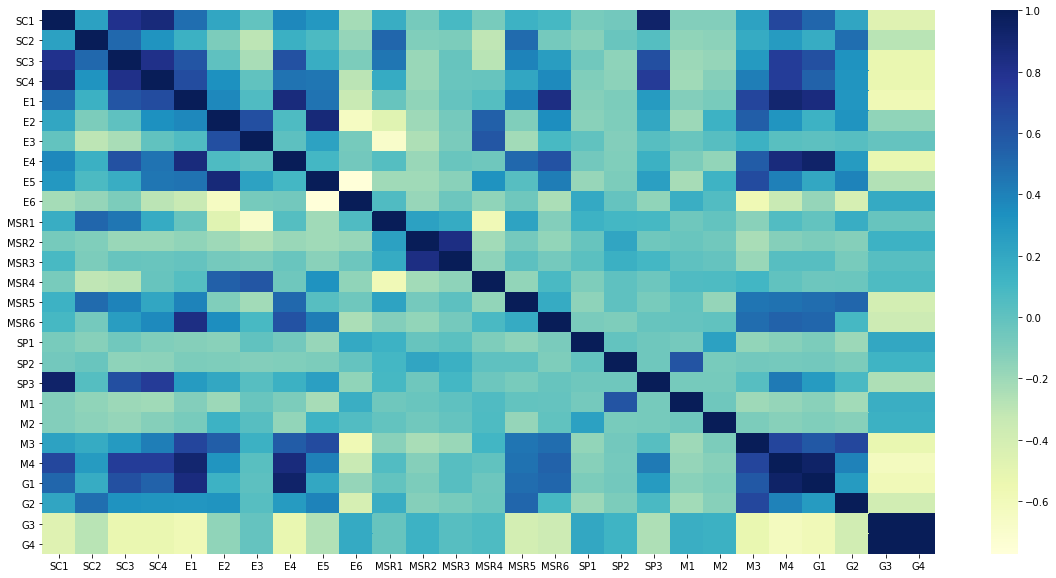

In [17]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

df_Data_Point_scaled_noNaN = df_Learners_3[:]
plt.figure(figsize=(20,10))
e = df_Data_Point_scaled_noNaN.corr()
sns.heatmap(e, cmap="YlGnBu")


In [18]:
from __future__ import print_function
import sys
import numpy
numpy.set_printoptions(linewidth=1000)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Do the PCA.

n=5
pca = PCA(n_components=n, random_state= 88)
pct = pca.fit_transform(df_Data_Point_scaled_noNaN)

# Append the principle components for each entry to the dataframe
for i in range(n):
    df_Data_Point_scaled_noNaN['PC' + str(i + 1)] = pct[:, i] # axis = ??

df_Data_Point_scaled_noNaN.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4,G1,G2,G3,G4,PC1,PC2,PC3,PC4,PC5
user_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3190300856,0.002986,0.114455,0.110980,0.134518,0.107458,0.245098,0.321874,0.113034,0.344828,0.216074,0.391251,0.019765,0.080808,0.162852,0.011166,0.105254,0.009582,0.013669,0.000516,0.120132,0.000000,0.676471,0.073652,0.009546,0.327168,0.206003,0.206003,0.511949,-0.121543,0.084144,-0.278599,-0.349544
3190300132,0.000121,0.048155,0.065430,0.111954,0.138190,0.752723,0.598935,0.072497,0.844828,0.032960,0.129129,0.026644,0.380952,0.629356,0.000000,0.114521,0.014962,0.046715,0.001296,0.000000,0.082789,0.558824,0.118611,0.000101,0.358246,0.832577,0.832577,0.058294,0.899248,-0.281873,-0.069057,-0.078678
3190301014,0.129375,0.160338,0.373142,0.189472,0.227114,0.222222,0.368729,0.280826,0.275862,0.244451,0.322496,0.009074,0.133333,0.153457,0.074442,0.121499,0.017730,0.008751,0.001174,0.000000,0.000000,0.588235,0.271453,0.175198,0.439428,0.005304,0.005304,0.922341,-0.283017,0.183813,-0.127588,-0.240456
3190300607,0.156781,0.096150,0.560609,0.179863,0.800606,0.253813,0.457035,1.000000,0.275862,0.235330,0.162173,0.000000,0.197531,0.252389,0.877171,0.390728,0.021467,0.000852,0.000622,0.000000,0.000000,1.000000,1.000000,1.000000,0.449080,0.000195,0.000195,1.854614,-0.296627,-0.033776,0.019243,1.064365
3190300962,0.000000,0.010372,0.031035,0.011318,0.058401,0.485839,1.000000,0.064017,0.310345,0.198193,0.066219,0.048157,0.133333,0.370688,0.000000,0.070978,0.007913,0.017982,0.001750,0.000000,0.000000,0.176471,0.024229,0.000000,0.008978,0.847440,0.847440,-0.353609,0.540358,0.229352,-0.034050,0.055358


In [19]:
df_Learners_3

,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4,G1,G2,G3,G4
user_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
3190300856,0.002986,0.114455,0.110980,0.134518,0.107458,0.245098,0.321874,0.113034,0.344828,0.216074,0.391251,0.019765,0.080808,0.162852,0.011166,0.105254,0.009582,0.013669,0.000516,0.120132,0.000000,0.676471,0.073652,0.009546,0.327168,0.206003,0.206003
3190300132,0.000121,0.048155,0.065430,0.111954,0.138190,0.752723,0.598935,0.072497,0.844828,0.032960,0.129129,0.026644,0.380952,0.629356,0.000000,0.114521,0.014962,0.046715,0.001296,0.000000,0.082789,0.558824,0.118611,0.000101,0.358246,0.832577,0.832577
3190301014,0.129375,0.160338,0.373142,0.189472,0.227114,0.222222,0.368729,0.280826,0.275862,0.244451,0.322496,0.009074,0.133333,0.153457,0.074442,0.121499,0.017730,0.008751,0.001174,0.000000,0.000000,0.588235,0.271453,0.175198,0.439428,0.005304,0.005304
3190300607,0.156781,0.096150,0.560609,0.179863,0.800606,0.253813,0.457035,1.000000,0.275862,0.235330,0.162173,0.000000,0.197531,0.252389,0.877171,0.390728,0.021467,0.000852,0.000622,0.000000,0.000000,1.000000,1.000000,1.000000,0.449080,0.000195,0.000195
3190300962,0.000000,0.010372,0.031035,0.011318,0.058401,0.485839,1.000000,0.064017,0.310345,0.198193,0.066219,0.048157,0.133333,0.370688,0.000000,0.070978,0.007913,0.017982,0.001750,0.000000,0.000000,0.176471,0.024229,0.000000,0.008978,0.847440,0.847440
3190300799,0.000243,0.029820,0.063747,0.132519,0.100895,0.450980,0.495968,0.076380,0.534483,0.128025,0.087225,0.027285,0.133333,0.426644,0.000000,0.152715,0.011817,0.007829,0.034405,0.011634,0.052288,0.235294,0.007347,0.000043,0.013354,0.851480,0.851480
3190300670,0.005136,0.147805,0.181633,0.082719,0.051311,0.057734,0.396134,0.157937,0.000000,0.869565,0.260775,0.017013,0.197531,0.087690,0.029777,0.076561,0.029831,0.014350,0.000178,0.048306,0.000000,0.147059,0.005001,0.001329,0.016020,1.000000,1.000000
3190300348,0.000000,0.073903,0.258319,0.139792,0.053476,0.083878,0.186025,0.097979,0.120690,0.468728,0.188528,0.019495,0.133333,0.194170,0.013648,0.081268,0.025895,0.013062,0.000347,0.057157,0.037037,0.058824,0.003520,0.000000,0.008010,0.847440,0.847440
3190301011,0.000809,0.172677,0.130304,0.113905,0.092557,0.323529,0.429988,0.087629,0.396552,0.184932,0.193691,0.023571,0.080808,0.284992,0.000000,0.107985,0.163647,0.010343,0.001303,0.007081,0.000000,0.294118,0.043567,0.000188,0.037449,0.867852,0.867852


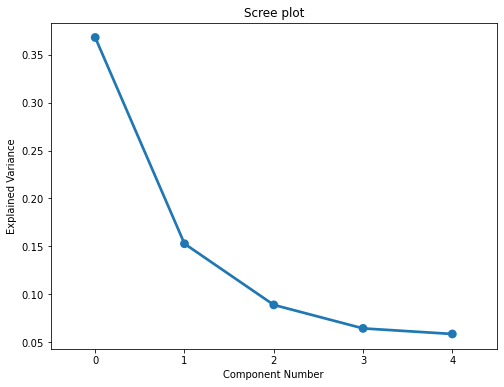

In [20]:
# Do a scree plot
ind = np.arange(n)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

In [21]:
check_loadings_pca = pca.components_
check_eigenValues_pca = pca.explained_variance_ratio_
df_Data_Point_scaled_noNaN_check_pca = df_Data_Point_scaled_noNaN.reindex(columns=df_Learners_3.columns)

In [22]:
num_pc = 5
check_pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
check_loadings_df = pd.DataFrame.from_dict(dict(zip(check_pc_list, check_loadings_pca)))
check_loadings_df['variable'] = df_Data_Point_scaled_noNaN_check_pca.columns.values
check_loadings_df = check_loadings_df.set_index('variable')
check_loadings_df

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
SC1,0.131002,-0.031681,-0.034132,0.311671,-0.028402
SC2,0.088998,-0.128918,-0.216895,-0.096653,-0.067170
SC3,0.187652,-0.160116,-0.117432,0.304314,0.061510
SC4,0.176033,-0.002864,-0.066483,0.305840,-0.011776
E1,0.214833,0.038198,-0.036693,0.175969,0.258892
E2,0.122668,0.435753,-0.032950,0.057648,-0.058674
E3,0.018655,0.394167,0.357310,-0.027140,0.184104
E4,0.159836,-0.059032,0.009449,0.093708,0.338879
E5,0.185318,0.389348,-0.223982,0.078354,-0.188624


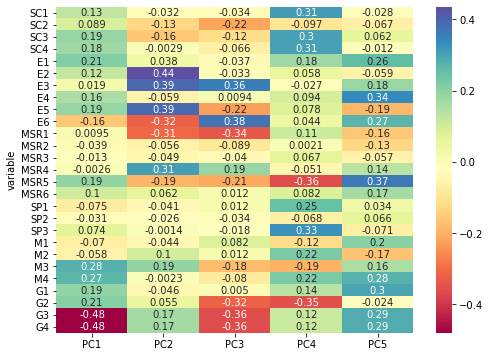

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(check_loadings_df, annot=True, cmap='Spectral')
plt.show()

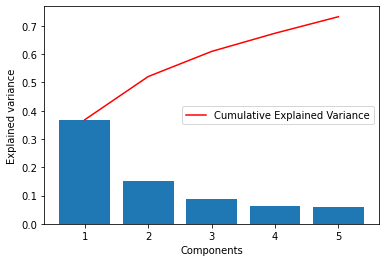

In [24]:
plt.bar(range(1, len(check_eigenValues_pca)+1), check_eigenValues_pca)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(check_eigenValues_pca)+1),
         np.cumsum(check_eigenValues_pca),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='center right')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


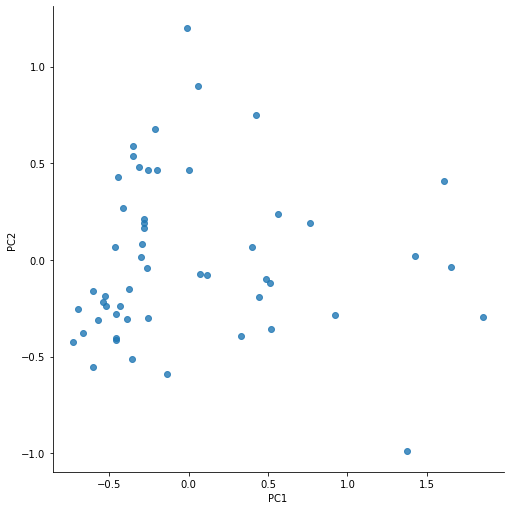

In [25]:
g = sns.lmplot('PC1',
               'PC2',
               data=df_Data_Point_scaled_noNaN,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()

In [26]:
df_Data_Point_scaled_noNaN = df_Data_Point_scaled_noNaN.drop(columns =['PC3', 'PC4', 'PC5']) 
df_Data_Point_scaled_noNaN_0 = df_Data_Point_scaled_noNaN.drop(columns =['PC1', 'PC2'], inplace = False) 

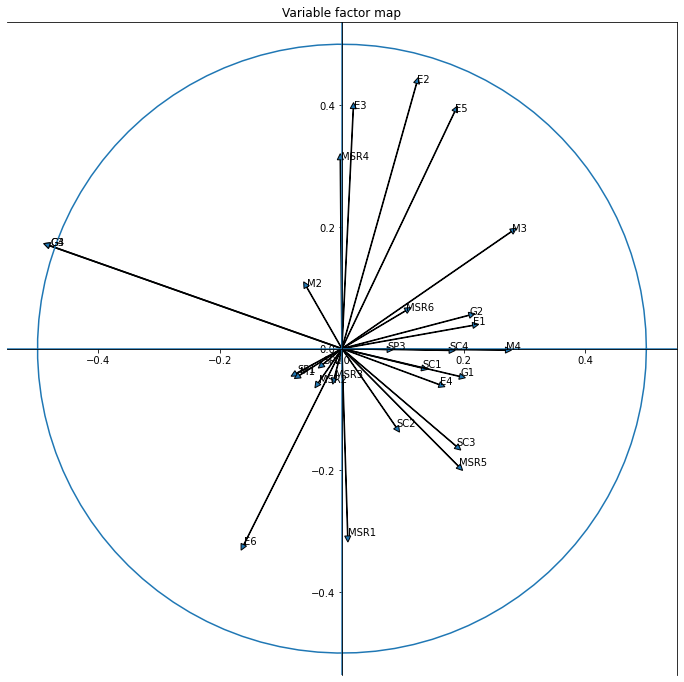

In [27]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(df_Data_Point_scaled_noNaN_0.columns)):          # Each PCA's number of features
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.01,
             head_length=0.01)
    plt.text(pca.components_[0, i] + 0.001,
             pca.components_[1, i] + 0.001,
             df_Data_Point_scaled_noNaN_0.columns[i])                   

# Name of columns = Name of features

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(0.5 * np.cos(an), 0.5 * np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')

ax.spines['left'].set_position('zero')  # 将左边框置于数据坐标原点
ax.spines['bottom'].set_position('zero')  # 将底边框置于数据坐标原点

plt.axvline(0)  #從原點畫個垂直線
plt.axhline(0)  #從原點畫個平行線


plt.show()

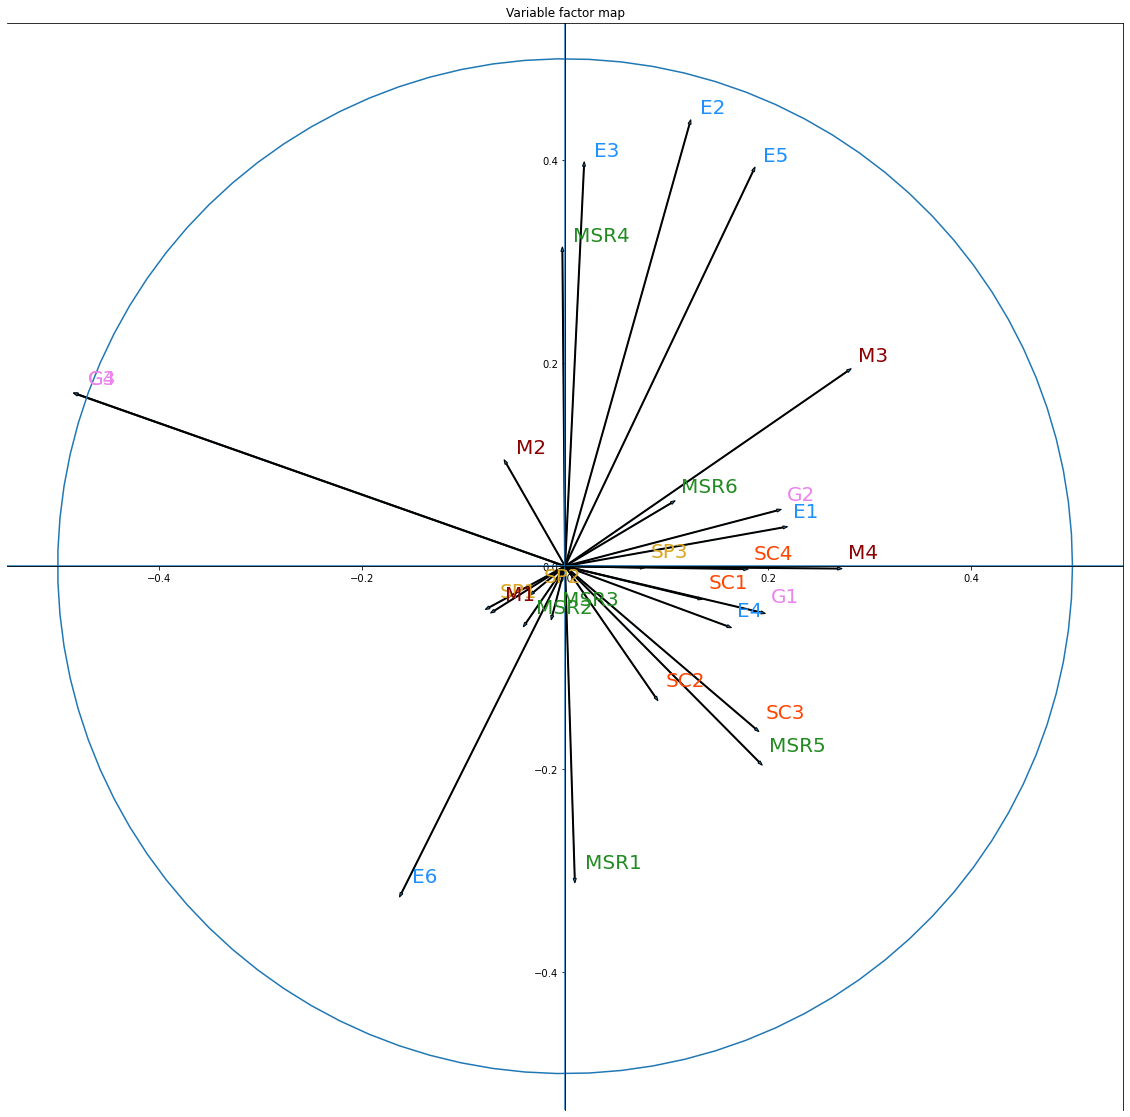

In [28]:
# zoom in
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np


(fig, ax) = plt.subplots(figsize=(20, 20))
for i in range(0, len(df_Data_Point_scaled_noNaN_0.columns)):          # Each PCA's number of features
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             )
    if i < 4: 
        plt.text(pca.components_[0, i] + 0.01,
             pca.components_[1, i] + 0.01,
             df_Data_Point_scaled_noNaN_0.columns[i], fontsize=20, color='orangered')
    elif i < 10:
        plt.text(pca.components_[0, i] + 0.01,
             pca.components_[1, i] + 0.01,
             df_Data_Point_scaled_noNaN_0.columns[i], fontsize=20, color='dodgerblue')            
    elif i < 16:
        plt.text(pca.components_[0, i] + 0.01,
             pca.components_[1, i] + 0.01,
             df_Data_Point_scaled_noNaN_0.columns[i], fontsize=20, color='forestgreen')        
    elif i < 19: 
        plt.text(pca.components_[0, i] + 0.01,
             pca.components_[1, i] + 0.01,
             df_Data_Point_scaled_noNaN_0.columns[i], fontsize=20, color='goldenrod')        
    elif i < 23: 
        plt.text(pca.components_[0, i] + 0.01,
             pca.components_[1, i] + 0.01,
             df_Data_Point_scaled_noNaN_0.columns[i], fontsize=20, color='darkred')        
    else:  
        plt.text(pca.components_[0, i] + 0.01,
             pca.components_[1, i] + 0.01,
             df_Data_Point_scaled_noNaN_0.columns[i], fontsize=20, color='violet')        
# Name of columns = Name of features

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(0.5 * np.cos(an), 0.5 * np.sin(an))  # Add a unit circle for scale
plt.axis('equal')

ax.set_title('Variable factor map')

ax.spines['left'].set_position('zero')  # 将左边框置于数据坐标原点
ax.spines['bottom'].set_position('zero')  # 将底边框置于数据坐标原点

plt.axvline(0)  #從原點畫個垂直線
plt.axhline(0)  #從原點畫個平行線


plt.show()

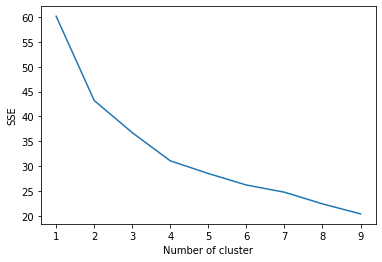

In [29]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_Data_Point_scaled_noNaN_0)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

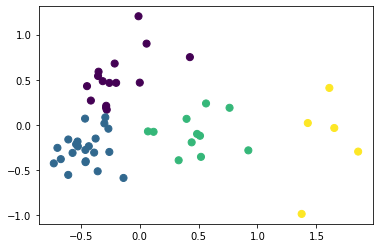

In [30]:
df_Data_Point_scaled_noNaN_2 = df_Data_Point_scaled_noNaN[['PC1','PC2']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_Data_Point_scaled_noNaN_2)
y_kmeans = kmeans.predict(df_Data_Point_scaled_noNaN_2)

x = df_Data_Point_scaled_noNaN_2['PC1'].astype('float32')
y = df_Data_Point_scaled_noNaN_2['PC2'].astype('float32')
c = y_kmeans.astype('float32')

plt.scatter(x, y, c=c, s=50, cmap='viridis')

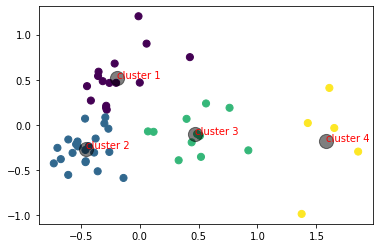

In [31]:
plt.scatter(x, y, c=c, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


n = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']
for i, txt in enumerate(n):
    plt.annotate(txt, (centers[i, 0], centers[i, 1]), color='red')

plt.show()

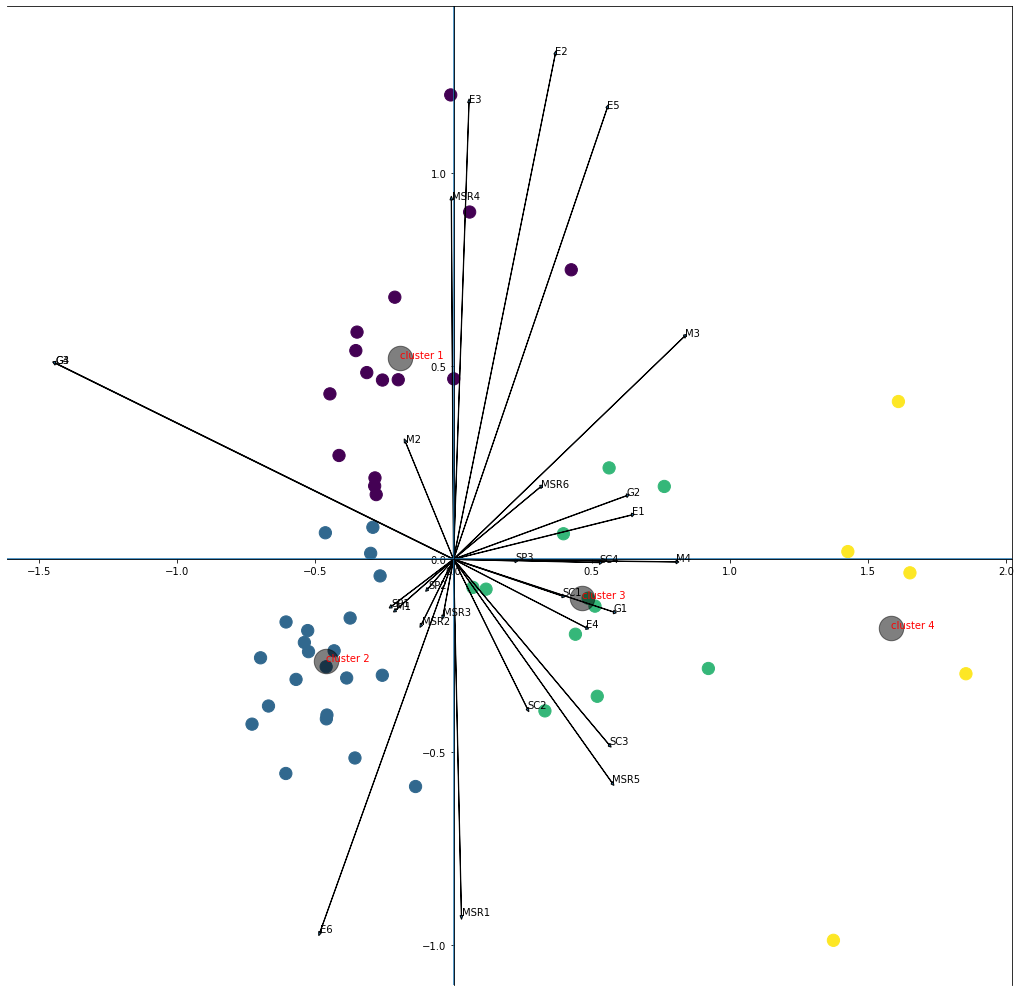

In [32]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(18, 18))
for i in range(0, len(df_Data_Point_scaled_noNaN_0.columns)):          # Each PCA's number of features
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i] * 3,  #0 for PC1
             pca.components_[1, i] * 3,  #1 for PC2
             head_width=0.01,
             head_length=0.01)
    plt.text(pca.components_[0, i] * 3 + 0.001,
             pca.components_[1, i] * 3 + 0.001,
             df_Data_Point_scaled_noNaN_0.columns[i])                   

# Name of columns = Name of features

ax.spines['left'].set_position('zero')  # 将左边框置于数据坐标原点
ax.spines['bottom'].set_position('zero')  # 将底边框置于数据坐标原点

plt.axvline(0)  #從原點畫個垂直線
plt.axhline(0)  #從原點畫個平行線


plt.scatter(x, y, c=c, s=150, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=600, alpha=0.5)


n = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']
for i, txt in enumerate(n):
    plt.annotate(txt, (centers[i, 0], centers[i, 1]), color='red')

plt.show()

In [33]:
df_Data_Point_scaled_noNaN['cluster'] = y_kmeans
df_Data_Point_scaled_noNaN.head()

,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4,G1,G2,G3,G4,PC1,PC2,cluster
user_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3190300856,0.002986,0.114455,0.110980,0.134518,0.107458,0.245098,0.321874,0.113034,0.344828,0.216074,0.391251,0.019765,0.080808,0.162852,0.011166,0.105254,0.009582,0.013669,0.000516,0.120132,0.000000,0.676471,0.073652,0.009546,0.327168,0.206003,0.206003,0.511949,-0.121543,2
3190300132,0.000121,0.048155,0.065430,0.111954,0.138190,0.752723,0.598935,0.072497,0.844828,0.032960,0.129129,0.026644,0.380952,0.629356,0.000000,0.114521,0.014962,0.046715,0.001296,0.000000,0.082789,0.558824,0.118611,0.000101,0.358246,0.832577,0.832577,0.058294,0.899248,0
3190301014,0.129375,0.160338,0.373142,0.189472,0.227114,0.222222,0.368729,0.280826,0.275862,0.244451,0.322496,0.009074,0.133333,0.153457,0.074442,0.121499,0.017730,0.008751,0.001174,0.000000,0.000000,0.588235,0.271453,0.175198,0.439428,0.005304,0.005304,0.922341,-0.283017,2
3190300607,0.156781,0.096150,0.560609,0.179863,0.800606,0.253813,0.457035,1.000000,0.275862,0.235330,0.162173,0.000000,0.197531,0.252389,0.877171,0.390728,0.021467,0.000852,0.000622,0.000000,0.000000,1.000000,1.000000,1.000000,0.449080,0.000195,0.000195,1.854614,-0.296627,3
3190300962,0.000000,0.010372,0.031035,0.011318,0.058401,0.485839,1.000000,0.064017,0.310345,0.198193,0.066219,0.048157,0.133333,0.370688,0.000000,0.070978,0.007913,0.017982,0.001750,0.000000,0.000000,0.176471,0.024229,0.000000,0.008978,0.847440,0.847440,-0.353609,0.540358,0


In [34]:
df_Data_Point_scaled_noNaN_new = df_Data_Point_scaled_noNaN.copy(deep=True)

df_Data_Point_scaled_noNaN_new['Self_control'] = df_Data_Point_scaled_noNaN_new.iloc[:, :4].mean(axis=1)
df_Data_Point_scaled_noNaN_new['Engagement'] = df_Data_Point_scaled_noNaN_new.iloc[:, 4:10].mean(axis=1)
df_Data_Point_scaled_noNaN_new['Metacognition'] = df_Data_Point_scaled_noNaN_new.iloc[:, 10:16].mean(axis=1)
df_Data_Point_scaled_noNaN_new['Self_perception'] = df_Data_Point_scaled_noNaN_new.iloc[:, 16:19].mean(axis=1)
df_Data_Point_scaled_noNaN_new['Motivation'] = df_Data_Point_scaled_noNaN_new.iloc[:, 19:23].mean(axis=1)
df_Data_Point_scaled_noNaN_new['Grit'] = df_Data_Point_scaled_noNaN_new.iloc[:, 23:27].mean(axis=1)

df_Data_Point_scaled_noNaN_new = df_Data_Point_scaled_noNaN_new.drop(list(df_Data_Point_scaled_noNaN_new)[:27], axis=1)
df_Data_Point_scaled_noNaN_new

,PC1,PC2,cluster,Self_control,Engagement,Metacognition,Self_perception,Motivation,Grit
user_ID,,,,,,,,,
3190300856,0.511949,-0.121543,2,0.090735,0.224728,0.128516,0.007922,0.217564,0.187180
3190300132,0.058294,0.899248,0,0.056415,0.406689,0.213434,0.020991,0.190056,0.505875
3190301014,0.922341,-0.283017,2,0.213082,0.269867,0.135717,0.009218,0.214922,0.156309
3190300607,1.854614,-0.296627,3,0.248351,0.503774,0.313332,0.007647,0.500000,0.362368
3190300962,-0.353609,0.540358,0,0.013181,0.352799,0.114896,0.009215,0.050175,0.425964
3190300799,-0.257194,0.464094,0,0.056582,0.297789,0.137867,0.018017,0.076641,0.429089
3190300670,-0.669773,-0.380233,1,0.104323,0.255447,0.111558,0.014787,0.050091,0.504337
3190300348,-0.461059,-0.278491,1,0.118003,0.168463,0.105074,0.013101,0.039134,0.425722
3190301011,-0.284381,0.210595,0,0.104424,0.252531,0.115174,0.058431,0.086191,0.443335


C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Grit', ylabel='Density'>

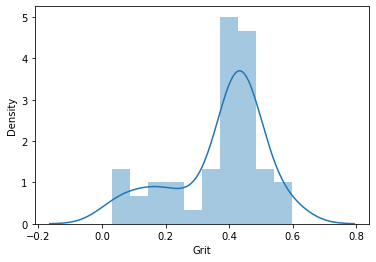

In [35]:
#### EDA and Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt#### EDA and Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df_Data_Point_scaled_noNaN_new['Grit'])


C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Self_control', ylabel='Density'>

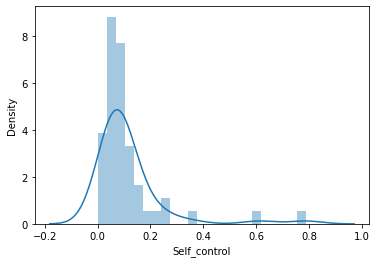

In [36]:
sns.distplot(df_Data_Point_scaled_noNaN_new['Self_control'])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Engagement', ylabel='Density'>

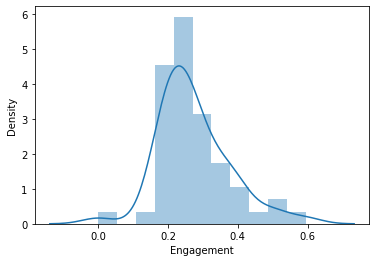

In [37]:
sns.distplot(df_Data_Point_scaled_noNaN_new['Engagement'])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Metacognition', ylabel='Density'>

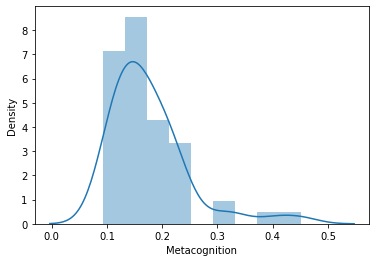

In [38]:
sns.distplot(df_Data_Point_scaled_noNaN_new['Metacognition'])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Self_perception', ylabel='Density'>

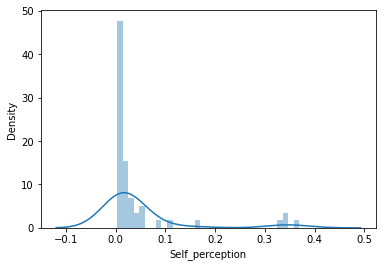

In [39]:
sns.distplot(df_Data_Point_scaled_noNaN_new['Self_perception'])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Motivation', ylabel='Density'>

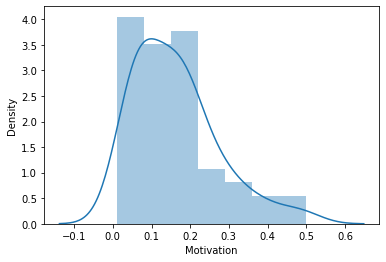

In [40]:
sns.distplot(df_Data_Point_scaled_noNaN_new['Motivation'])

In [41]:
cluster_1 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 0]
cluster_2 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 1]
cluster_3 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 2]
cluster_4 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 3]

In [57]:
print(cluster_1.shape)
print(cluster_2.shape)
print(cluster_3.shape)
print(cluster_4.shape)

(15, 30)
(22, 30)
(11, 30)
(5, 30)


In [42]:
mean_cluster_1 = cluster_1.mean(axis=0) 
mean_cluster_2 = cluster_2.mean(axis=0) 
mean_cluster_3 = cluster_3.mean(axis=0) 
mean_cluster_4 = cluster_4.mean(axis=0) 

In [43]:
list_mean_cluster_1 = mean_cluster_1.tolist() 
list_mean_cluster_2 = mean_cluster_2.tolist() 
list_mean_cluster_3 = mean_cluster_3.tolist()
list_mean_cluster_4 = mean_cluster_4.tolist()

In [53]:
df_cluster = pd.DataFrame(columns = df_Data_Point_scaled_noNaN.columns)
df_cluster = df_cluster.append(pd.Series(list_mean_cluster_1, index= df_Data_Point_scaled_noNaN.columns), ignore_index=True)
df_cluster = df_cluster.append(pd.Series(list_mean_cluster_2, index= df_Data_Point_scaled_noNaN.columns), ignore_index=True)
df_cluster = df_cluster.append(pd.Series(list_mean_cluster_3, index= df_Data_Point_scaled_noNaN.columns), ignore_index=True)
df_cluster = df_cluster.append(pd.Series(list_mean_cluster_4, index= df_Data_Point_scaled_noNaN.columns), ignore_index=True)
df_cluster

,SC1,SC2,SC3,SC4,E1,E2,E3,E4,E5,E6,MSR1,MSR2,MSR3,MSR4,MSR5,MSR6,SP1,SP2,SP3,M1,M2,M3,M4,G1,G2,G3,G4,PC1,PC2,cluster
0,0.000513,0.062017,0.078749,0.107049,0.104058,0.487436,0.674522,0.091308,0.471264,0.180812,0.133091,0.027749,0.158887,0.472460,0.042432,0.115896,0.090232,0.027052,0.003760,0.049334,0.158170,0.349020,0.055296,0.000507,0.145505,0.839549,0.839549,-0.194901,0.520201,0.0
1,0.000975,0.088654,0.143514,0.088442,0.058141,0.113042,0.288218,0.105956,0.138715,0.498652,0.368511,0.071451,0.198898,0.210252,0.092375,0.081759,0.111266,0.076329,0.000399,0.171219,0.119033,0.156417,0.011394,0.000301,0.033374,0.851204,0.851204,-0.460005,-0.263868,1.0
2,0.023355,0.100533,0.159155,0.132500,0.119527,0.283224,0.407789,0.127439,0.362069,0.300697,0.240908,0.021999,0.148587,0.231470,0.193548,0.125023,0.023145,0.025784,0.000756,0.098772,0.093682,0.441176,0.072808,0.037830,0.293184,0.225405,0.225405,0.465888,-0.100652,2.0
3,0.342328,0.323562,0.603301,0.537740,0.589032,0.410022,0.389036,0.491244,0.548276,0.130475,0.397629,0.002305,0.200741,0.255359,0.523325,0.332980,0.014578,0.023974,0.200636,0.029540,0.033551,0.705882,0.683539,0.481321,0.373453,0.001421,0.001421,1.583772,-0.178151,3.0


In [44]:
G = []
SC = []
E = []
MSR = []
SP = []
M = []

for i in range(4):
    XYZ1 = eval('list_mean_cluster_'+str(i+1))
    XYZ1 = XYZ1[23:27]
    G.append(np.mean(XYZ1))
    XYZ2 = eval('list_mean_cluster_'+str(i+1))
    XYZ2 = XYZ2[:4]
    SC.append(np.mean(XYZ2))
    XYZ3 = eval('list_mean_cluster_'+str(i+1))
    XYZ3 = XYZ3[4:10]
    E.append(np.mean(XYZ3))
    XYZ4 = eval('list_mean_cluster_'+str(i+1))
    XYZ4 = XYZ4[10:16]
    MSR.append(np.mean(XYZ4))
    XYZ5 = eval('list_mean_cluster_'+str(i+1))
    XYZ5 = XYZ5[16:19]
    SP.append(np.mean(XYZ5))
    XYZ6 = eval('list_mean_cluster_'+str(i+1))
    XYZ6 = XYZ6[19:23]
    M.append(np.mean(XYZ6))

In [45]:
print(G)
print(SC)
print(E)
print(MSR)
print(SP)
print(M)

[0.4562777851884467, 0.4340206664376168, 0.1954559742980963, 0.21440390455723635]
[0.06208210290948321, 0.0803962973695468, 0.1038856257028257, 0.45173295360679905]
[0.334900074995931, 0.20045404231569108, 0.2667907740702443, 0.42634744981618306]
[0.15841915202036302, 0.17054120360709354, 0.16025579673103954, 0.2853897123188131]
[0.04034809663282335, 0.06266460868714904, 0.01656174443195782, 0.07972942076168461]
[0.15295490336140624, 0.11451596422986485, 0.17660963186668927, 0.3631279745807902]


In [46]:
Learners = {}
for i in range(4):
    Learners['Persona'+str(i+1)] = [G[i], SC[i], E[i], MSR[i], SP[i], M[i]]

Learners

{'Persona1': [0.4562777851884467,
  0.06208210290948321,
  0.334900074995931,
  0.15841915202036302,
  0.04034809663282335,
  0.15295490336140624],
 'Persona2': [0.4340206664376168,
  0.0803962973695468,
  0.20045404231569108,
  0.17054120360709354,
  0.06266460868714904,
  0.11451596422986485],
 'Persona3': [0.1954559742980963,
  0.1038856257028257,
  0.2667907740702443,
  0.16025579673103954,
  0.01656174443195782,
  0.17660963186668927],
 'Persona4': [0.21440390455723635,
  0.45173295360679905,
  0.42634744981618306,
  0.2853897123188131,
  0.07972942076168461,
  0.3631279745807902]}

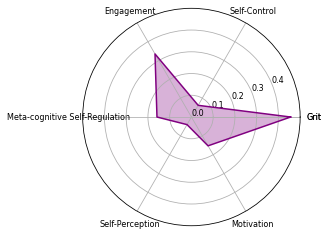

In [47]:
from math import pi

categories = ['Grit', 'Self-Control', 'Engagement', 'Meta-cognitive Self-Regulation', 'Self-Perception', 'Motivation']
N = len(categories)

angles0 = [n / float(N)*2*pi for n in range(N)]

Learners['Persona1'] += Learners['Persona1'][:1]
angles0 += angles0[:1]
categories += categories[:1]

plt.polar(angles0, Learners['Persona1'], 'purple')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona1'], 'purple', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.5)
axes.set_yticks(np.arange(0,0.5,0.1))


plt.show()

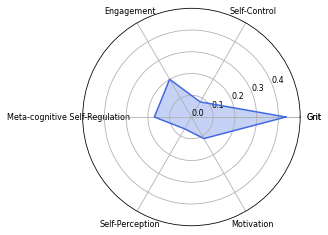

In [48]:
Learners['Persona2'] += Learners['Persona2'][:1]

plt.polar(angles0, Learners['Persona2'], 'royalblue')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona2'], 'royalblue', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.5)
axes.set_yticks(np.arange(0,0.5,0.1))

plt.show()

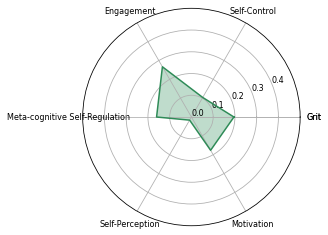

In [49]:
Learners['Persona3'] += Learners['Persona3'][:1]

plt.polar(angles0, Learners['Persona3'], 'seagreen')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona3'],'seagreen', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.5)
axes.set_yticks(np.arange(0,0.5,0.1))

plt.show()

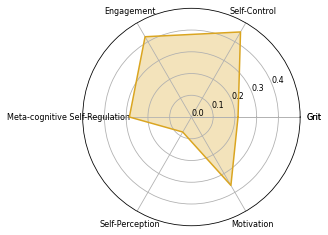

In [50]:
Learners['Persona4'] += Learners['Persona4'][:1]

plt.polar(angles0, Learners['Persona4'], 'goldenrod')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona4'],'goldenrod', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.5)
axes.set_yticks(np.arange(0,0.5,0.1))

plt.show()